# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

## Missing Data

In [5]:
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
col_missing_data

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

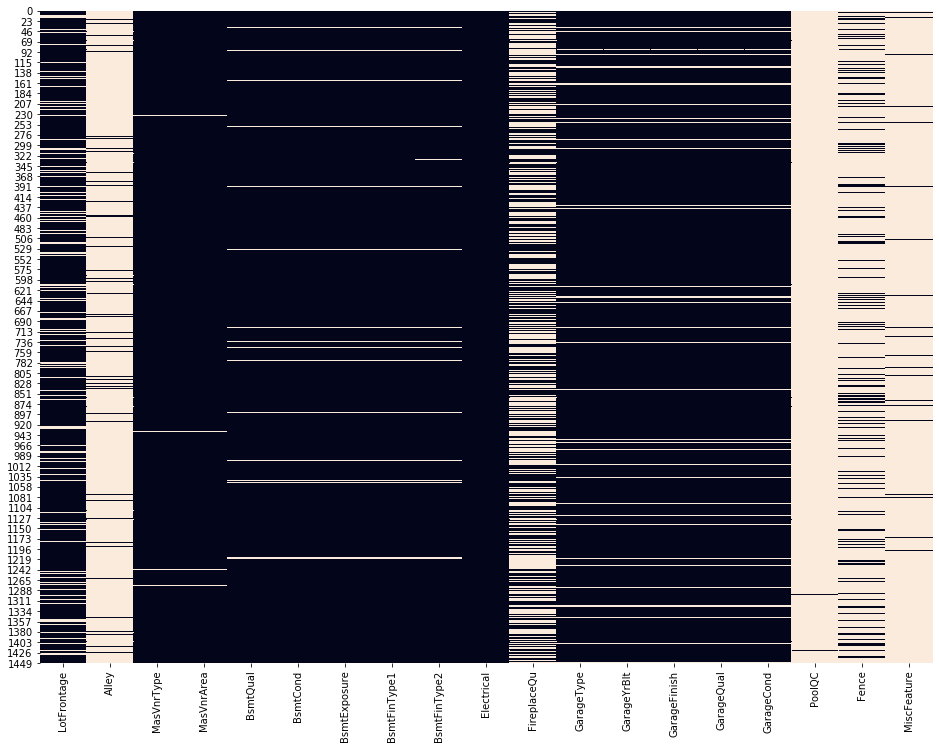

In [6]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False)

### Handle high missing amount of data

In [7]:
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
for col in cols:
    print(df_train[col].value_counts())
    print(df_train[col].nunique()) 


Grvl    50
Pave    41
Name: Alley, dtype: int64
2
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
3
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
4
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
4
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
5


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# le.fit(["paris", "paris", "tokyo", "amsterdam"])
# list(le.classes_)
# le.transform(["tokyo", "tokyo", "paris"])
# list(le.inverse_transform([2, 2, 1]))

In [9]:
for col in cols:
    le = LabelEncoder()
    le.fit(df_train[col].unique().astype('str'))
    print(le.classes_)
    df_train.loc[:,col] = le.transform(df_train.loc[:,col].astype('str'))
    print(list(df_train.loc[:,col].unique()))

df_train[cols].head()

['Grvl' 'Pave' 'nan']
[2, 0, 1]
['Ex' 'Fa' 'Gd' 'nan']
[3, 0, 1, 2]
['GdPrv' 'GdWo' 'MnPrv' 'MnWw' 'nan']
[4, 2, 1, 0, 3]
['Gar2' 'Othr' 'Shed' 'TenC' 'nan']
[4, 2, 0, 1, 3]
['Ex' 'Fa' 'Gd' 'Po' 'TA' 'nan']
[5, 4, 2, 1, 0, 3]


,Alley,PoolQC,Fence,MiscFeature,FireplaceQu
0,2,3,4,4,5
1,2,3,4,4,4
2,2,3,4,4,4
3,2,3,4,4,2
4,2,3,4,4,4


In [10]:
cols.extend(['SalePrice'])
df_train[cols].head()

,Alley,PoolQC,Fence,MiscFeature,FireplaceQu,SalePrice
0,2,3,4,4,5,208500
1,2,3,4,4,4,181500
2,2,3,4,4,4,223500
3,2,3,4,4,2,140000
4,2,3,4,4,4,250000


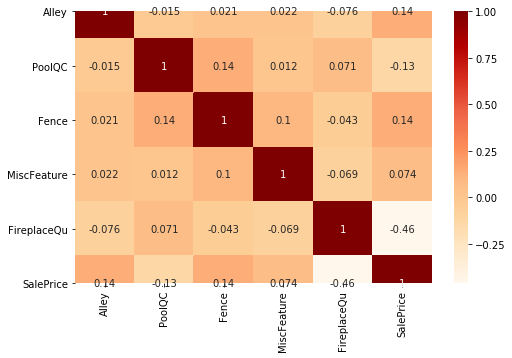

In [19]:
#heatmap might not be a good reference when there's huge missing data
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_train[cols].corr(), cbar=True, cmap='OrRd', annot=True)

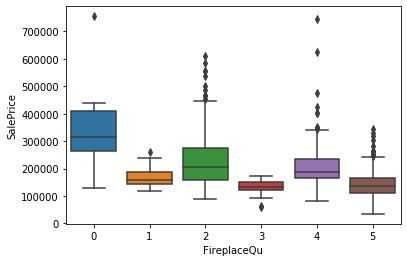

In [12]:
sns.boxplot(x=df_train['FireplaceQu'], y = df_train['SalePrice'])

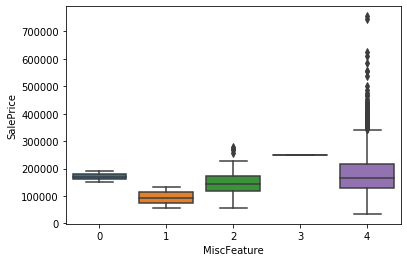

In [13]:
sns.boxplot(x=df_train['MiscFeature'], y = df_train['SalePrice'])

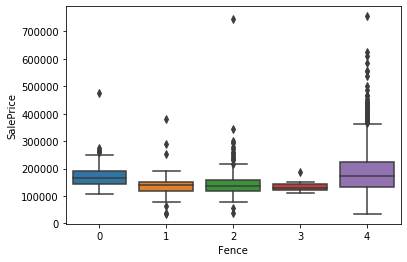

In [15]:
sns.boxplot(x=df_train['Fence'], y = df_train['SalePrice'])

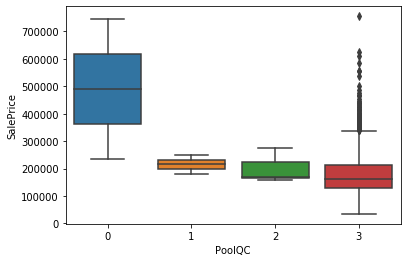

In [16]:
sns.boxplot(x=df_train['PoolQC'], y = df_train['SalePrice'])

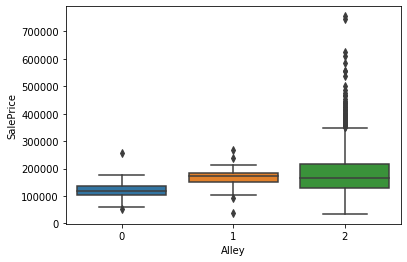

In [17]:
sns.boxplot(x=df_train['Alley'], y = df_train['SalePrice'])

In [ ]:
df_train['FireplaceQu'].isnull().sum()/df_train.count().max()

In [ ]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [ ]:
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
df_train[col_missing_data].head(20)

## Strategy For missing data

### Categorical

In [ ]:
df_train[col_missing_data]

In [ ]:
categoricals = df_train.select_dtypes(exclude=np.number).columns.tolist()
categoricals

In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
  
missing_categorical_cols = intersection(col_missing_data, categoricals)
missing_categorical_cols

In [ ]:
#someone figure out what this data refers to and think of the strategy to fill in
for missing_categorical in missing_categorical_cols:
    print(df_train[missing_categorical].unique())

In [ ]:
#FILL CATEGORICAL

### Encoding Categorical Data

In [ ]:
for categorical in categoricals:
    df_train.loc[:,categorical] = label_encoder.fit_transform(df_train.loc[:,categorical].astype('str')).astype('float64')
df_train[categoricals].head()

### Numeric

In [ ]:
numericals = df_train.select_dtypes(include=np.number).columns.tolist()
numericals

In [ ]:
missing_numerical_cols = intersection(col_missing_data, numericals)
missing_numerical_cols

In [ ]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageArea'].sum()

In [ ]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageCars'].sum()

In [ ]:
#someone figure out what this data refers to and think of the strategy to fill in
for missing_numerical in missing_numerical_cols:
    print(df_train[missing_numerical].unique())

In [ ]:
#FILL NUMERIC

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.isnull(), cbar=False)

# Visualizations

In [ ]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_train.corr(), cmap = 'OrRd');

In [ ]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

In [ ]:
#Start with Weak Positive Correlation
corr = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5].sort_values(ascending = False)
corr

In [ ]:
#Closer Look with values that correlate with saleprice.

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].corr(), cbar=True, annot=True, cmap=sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light"));

In [ ]:
# Strong Correlation values between predictor variable!
# GarageCars & GarageArea. Increase In Area of Garage -> Increase in number Cars
# TotRmsAbvGrd & GrLivArea. Total rooms above grade (does not include bathrooms) & Above grade (ground) living area square feet
# 1stFlrSF & TotalBsmtSF. First Floor square feet & Total square feet of basement area

In [ ]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

In [ ]:
sns.scatterplot(x = df_train['SalePrice'], y = df_train['GarageFinish'])

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].isnull(), cmap = 'Greys');

In [ ]:
df_train['SalePrice'].describe()

In [ ]:
sns.set(style="whitegrid",)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y=df_train["SalePrice"])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# Positive skew https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc


In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
sns.boxplot(x='SalePrice', y=corr.index, data=df_train)

In [ ]:
sns.pairplot(data = df_train[cor.index])

# Prediction

## XGBoost

## RandomForestRegressor

## 3-layer Feedforward Neural Network

##  